In [5]:
pwd

'C:\\Users\\djans\\Documents\\HEAT_reproduction\\Interior'

In [2]:
import pickle
from plot import plot_graph_rplan, plot_polygons_rplan
import matplotlib.pyplot as plt
from utils import ROOM_ARRAY_Z
import numpy as np
from PIL import Image

In [6]:
COLORS = [np.array(ROOM_ARRAY_Z[n][1])/255 for n in range(18)]

polygon = pickle.load(open('./Interior_plan/geometry/5.pickle', 'rb'))
polygon

C:\Users\djans\AppData\Local\Temp\ipykernel_1552\1314480410.py:3: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  polygon = pickle.load(open('./Interior_plan/geometry/5.pickle', 'rb'))


([{0: <POLYGON ((124 79, 124 97, 123 97, 54 97, 54 105, 53 105, 43 105, 43 150, 54...>,
   1: <POLYGON ((54 163, 54 203, 121 203, 121 163, 54 163))>,
   2: <POLYGON ((156 137, 156 169, 214 169, 214 137, 156 137))>,
   3: <POLYGON ((115 54, 115 76, 146 76, 146 54, 115 54))>,
   4: <POLYGON ((54 54, 54 94, 121 94, 121 79, 112 79, 112 54, 54 54))>,
   5: <POLYGON ((149 54, 149 94, 197 94, 197 54, 149 54))>},
  {0: <POLYGON ((125 76, 125 79, 136 79, 136 76, 125 76))>,
   1: <POLYGON ((146 81, 146 92, 149 92, 149 81, 146 81))>,
   2: <POLYGON ((121 82, 121 93, 124 93, 124 82, 121 82))>,
   3: <POLYGON ((171 134, 171 137, 194 137, 194 134, 171 134))>,
   4: <POLYGON ((100 160, 100 163, 113 163, 113 160, 100 160))>},
  {0: <POLYGON ((115 54, 115 76, 146 76, 146 54, 115 54))>,
   1: <POLYGON ((54 54, 54 94, 121 94, 121 79, 112 79, 112 54, 54 54))>,
   2: <POLYGON ((149 54, 149 94, 197 94, 197 54, 149 54))>,
   3: <POLYGON ((124 79, 124 97, 123 97, 54 97, 54 105, 53 105, 43 105, 43 150, 54...>,

'\nThe code below here does not work\n'

<Figure size 640x480 with 0 Axes>

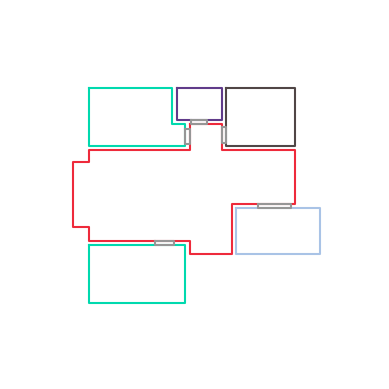

In [8]:
'''
This will print the plot 256px by 256px and save it to the file test.png.
TO DO:
1. The origional image is not square so we need to check wether the corners
   indicated in the geometry file are still in the correct location. 
   _>> the corners are not in the correct positons check with Krita.
2. It could be that the preprocessing step works better if the rooms are
   colored instead of white. If we want to use the preprosessing steps
'''
# Find the DPI of the screen
fig = plt.figure()
DPI = fig.dpi

# This create the figure.
# fig, axs = plt.subplots(figsize=(250/DPI, 250/DPI), dpi=DPI)
fig, axs = plt.subplots()
# This makes the image based on the polygon input
plot_polygons_rplan(polygon, axs, colors=COLORS)

# Save the figure to a specified file name 
# this produces and figure of 640x480 which is to big
fig.savefig('test.png') 

"""
The code below here does not work
"""
# # This turns the figure into a rgb array of size 640x480x3.
# rgb_array = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
# rgb_array = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

# # This cuts out the middle part turning it into a rgb array of
# # size 256x256x3
# # This results in an incorrectly cut image
# print(rgb_array[193:449,113:369].shape)
# im = Image.fromarray(rgb_array[193:449,113:369])
# im.save("test_correctsize.jpeg")

In [ ]:
"""
Here we check wether the corners are still in the correct position
"""

In [46]:
"""
Use origional data and sets diffent parts of the image to different colors
"""
# Load the image
image = Image.open(r'Interior_Plan\dataset\floorplan_dataset\5.png')

# Convert the image to RGBA
image = image.convert('RGBA')
RGBA_array = np.array(image)

# Get the color to make transparent
# rgba values correspond to:
# Background (0,13,0,0), 
# Outer wall (127,14,0,0)
# Room (0, 2, 6, 255)
# LivingRoom (0,0,5,255) 
# Room (0,1,1,255)
# Inner wall (0,16,0,255)
# Door (0,17,0,255)

#To change:
Background = (0,13,0,0)
Outer_wall = (127,14,0,0)
Inner_wall = (0,16,0,255)
Door = (0,17,0,255)
Front_door = (255,15,0,0)


#Desired color:
# Desired_White = (255, 255, 255, 255) #White
# Desired_Black = (0,0,0,255) #Black

Color_Wall = (213,213,213,255)
Color_Room = (66,66,66,255)
Color_Background = (0,0,0,255) #Black



# Iterate through each pixel in the image and make the selected color transparent
for x in range(image.width):
    for y in range(image.height):
        pixel_color = image.getpixel((x, y))
#         if pixel_color not in [Background,Outer_wall,Inner_wall,Door,LivingRoom]:
#             print(pixel_color)
        if pixel_color in [Outer_wall,Inner_wall,Door,Front_door]:
            image.putpixel((x, y), Color_Wall) # use (0,0,0,0) for alpha channel
        if pixel_color == Background:
            image.putpixel((x, y), Color_Background)
        if pixel_color not in [Outer_wall,Inner_wall,Door,Front_door,Background]:
            image.putpixel((x, y), Color_Room)

# Save the modified image
image.save('./Image_processing/5_BlackBackground.png')

In [ ]:
"""
Iterate over each image to process to density file
"""

# for image_nmr in Interior\Interior_Plan\dataset\floorplan_dataset
# print(image_nmr)

# import the modules
import os
from os import listdir
 
# get the path/directory
folder_dir = "./Interior_Plan/dataset/floorplan_dataset"
for image_nmr in os.listdir(folder_dir):
 
     # check if the image ends with png
#     if (image_nmr.endswith(".png")):
#         print(image_nmr)
        
    # Load the image
#     image = Image.open(r'Interior_Plan\dataset\floorplan_dataset\ image_nmr'.png')
    image = Image.open(os.path.join(r'Interior_Plan\dataset\floorplan_dataset',image_nmr))
    # Convert the image to RGBA
    image = image.convert('RGBA')
    RGBA_array = np.array(image)

    # Get the color to make transparent
    # rgba values correspond to:
    # Background (0,13,0,0), 
    # Outer wall (127,14,0,0)
    # Room (0, 2, 6, 255)
    # LivingRoom (0,0,5,255) 
    # Room (0,1,1,255)
    # Inner wall (0,16,0,255)
    # Door (0,17,0,255)

    #To change:
    Background = (0,13,0,0)
    Outer_wall = (127,14,0,0)
    Inner_wall = (0,16,0,255)
    Door = (0,17,0,255)
    Front_door = (255,15,0,0)


    #Desired color:
    # Desired_White = (255, 255, 255, 255) #White
    # Desired_Black = (0,0,0,255) #Black

    Color_Wall = (213,213,213,255)
    Color_Room = (66,66,66,255)
    Color_Background = (0,0,0,255) #Black



    # Iterate through each pixel in the image and make the selected color transparent
    for x in range(image.width):
        for y in range(image.height):
            pixel_color = image.getpixel((x, y))
    #         if pixel_color not in [Background,Outer_wall,Inner_wall,Door,LivingRoom]:
    #             print(pixel_color)
            if pixel_color in [Outer_wall,Inner_wall,Door,Front_door]:
                image.putpixel((x, y), Color_Wall) # use (0,0,0,0) for alpha channel
            if pixel_color == Background:
                image.putpixel((x, y), Color_Background)
            if pixel_color not in [Outer_wall,Inner_wall,Door,Front_door,Background]:
                image.putpixel((x, y), Color_Room)

    # Save the modified image
#     image.save('./Image_processing/density/image_nmr.png')
    image.save(os.path.join(r'Image_processing\density',image_nmr))

In [ ]:
"""
Iterate over each image to process to density file
"""
 
# import the modules
import os
from os import listdir
 
# get the path/directory
folder_dir = "./Interior_Plan/dataset/floorplan_dataset"
for image_nmr in os.listdir(folder_dir):

        
    # Load the image
    image = Image.open(os.path.join(r'Interior_Plan\dataset\floorplan_dataset',image_nmr))
    
    # Convert the image to RGBA
    image = image.convert('RGBA')
    RGBA_array = np.array(image)

    # Get the color to make transparent
    # rgba values correspond to:
    # Background (0,13,0,0), 
    # Outer wall (127,14,0,0)
    # Room (0, 2, 6, 255)
    # LivingRoom (0,0,5,255) 
    # Room (0,1,1,255)
    # Inner wall (0,16,0,255)
    # Door (0,17,0,255)

    #To change:
    Background = (0,13,0,0)
    Outer_wall = (127,14,0,0)
    Inner_wall = (0,16,0,255)
    Door = (0,17,0,255)
    Front_door = (255,15,0,0)


    #Desired color:
    # Desired_White = (255, 255, 255, 255) #White
    # Desired_Black = (0,0,0,255) #Black

    Color_Wall = (0,255,255,255)
    Color_Room = (255,0,0,255)
    Color_Background = (0,0,0,255) #Black



    # Iterate through each pixel in the image and make the selected color transparent
    for x in range(image.width):
        for y in range(image.height):
            pixel_color = image.getpixel((x, y))
            if pixel_color in [Outer_wall,Inner_wall,Door,Front_door]:
                image.putpixel((x, y), Color_Wall)
            if pixel_color == Background:
                image.putpixel((x, y), Color_Background)
            if pixel_color not in [Outer_wall,Inner_wall,Door,Front_door,Background]:
                image.putpixel((x, y), Color_Room)

    # Save the modified image
    image.save(os.path.join(r'Image_processing\normals',image_nmr))

In [ ]:
"""
Save test data in text file
"""
folder_dir = "./Interior_Plan/dataset/floorplan_dataset"
for image_nmr in os.listdir(folder_dir):
    image_name = image_nmr - '.png'
    print(image_name)

    with open('test_list.txt', 'w') as f:
        print >>f, number